## Email Detection With Machine Learning
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS

In [51]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset path)
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
# Rename columns if needed
df.rename(columns={"column1": "Category", "column2": "Message"}, inplace=True)


In [53]:
# Rename columns
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

# Check column names after renaming
print("Columns after renaming:", df.columns)

# Encode categorical variables
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

Columns after renaming: Index(['Category', 'Message'], dtype='object')


In [54]:
# Basic dataset information
print("Shape of the dataset:", df.shape)
print("\nDataset information:")
df.info()


Shape of the dataset: (5572, 2)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [55]:
# Check for null values
print("\nNull values in the dataset:")
print(df.isnull().sum())



Null values in the dataset:
Category    0
Message     0
dtype: int64


In [56]:
# Remove duplicate entries
df = df.drop_duplicates(keep="first")


In [57]:
# Check for duplicates again
print("\nDuplicates in the dataset after removal:")
print(df.duplicated().sum())



Duplicates in the dataset after removal:
0


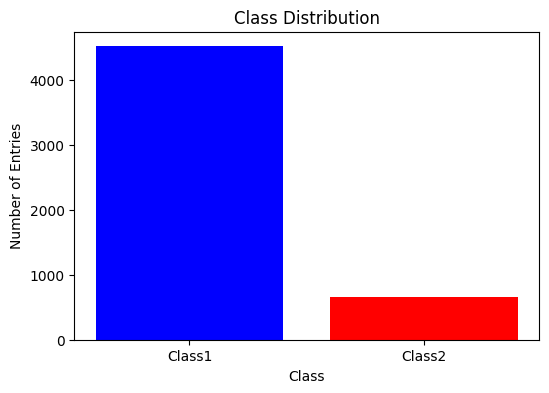

In [58]:

# Visualize class distribution
class_counts = df['Category'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Entries')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Class1', 'Class2'])  # Replace with your class labels
plt.show()


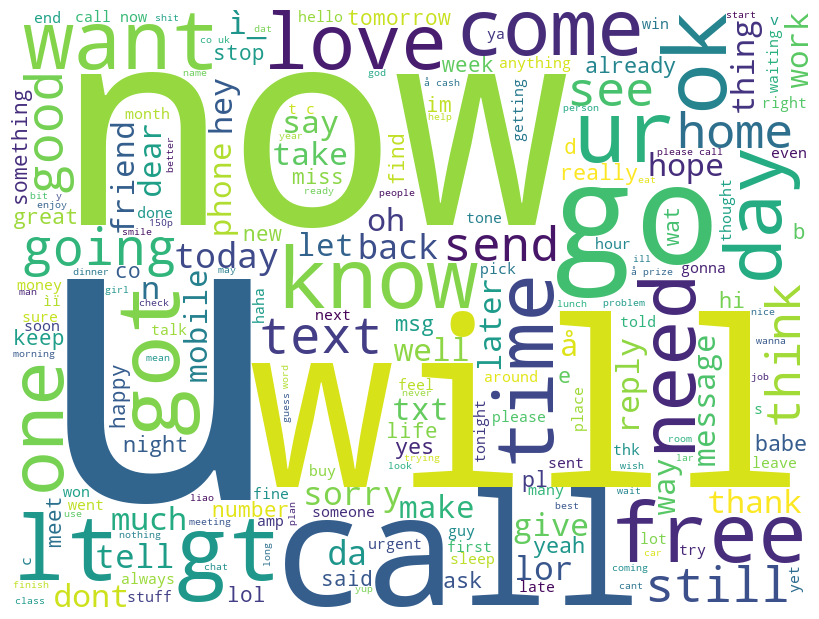

In [59]:
# Generate word cloud for text data
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Message:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Split data into training and testing sets
x = df['Message']
y = df["Category"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [60]:
# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)
y_pred = logreg.predict(X_test_cv)


In [61]:
# Evaluate Logistic Regression model
print('\nLogistic Regression Classifier Metrics:')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))



Logistic Regression Classifier Metrics:
Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 Score: 0.9202898550724637
Confusion Matrix:
 [[885   4]
 [ 18 127]]


In [62]:
# Train Multinomial Naive Bayes model
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [63]:
# Custom prediction example
custom_word = "Your custom message"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction_label = "Class2"
else:
    prediction_label = "Class1"

print(f"\nCustom word '{custom_word}' is predicted as: {prediction_label}")


Custom word 'Your custom message' is predicted as: Class1
